In [1]:
# Libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random as rd

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from scipy import stats


In [ ]:
# Project I
# Task I - Data Exploration and Pre-processing
# VoD - Pre-processing

# Basic Definitions
dsList = ["VoD-PeriodicLoad", "VoD-FlashcrowdLoad"]
dir = "~/Documentos/kth/project/datasets/"
target = "DispFrames"

# Main
for ds in dsList:
    #Read X, Y raw files
    xRaw = pd.read_csv(dir + ds + "/X.csv", 
                       usecols = lambda column : column not in ["TimeStamp"])
    #print("xRaw:")
    #print(xRaw)

    yRaw = pd.read_csv(dir + ds + "/Y.csv", 
                       usecols = [target])
    #print("yRaw:")
    #print(yRaw)    

    # Removing outliers
    xRawLimited = xRaw[(np.abs(stats.zscore(yRaw))<2).all(axis=1)]
    #print("xRawLimited:")
    #print(xRawLimited)

    yRawLimited = yRaw[(np.abs(stats.zscore(yRaw))<2).all(axis=1)]
    #print("yRawLimited:")
    #print(yRawLimited)

    # Pre-Processing
    xRawNormL2 = preprocessing.normalize(xRawLimited, norm='l2')
    #print("xRawNormL2:")
    #print(xRawNormL2)

    xRawStandard = preprocessing.scale(xRawLimited)
    #print("xRawStandard:")
    #print(xRawStandard)

    xRawRestriction = preprocessing.MinMaxScaler().fit_transform(xRawLimited)
    #print("xRawRestriction:")
    #print(xRawRestriction)

    #Create dataframes and save files
    xLimited = pd.DataFrame(xRawLimited)
    #print("xLimited:")
    #print(xLimited)
    xLimited.to_csv(dir + ds + "/XLimited.csv")

    yLimited = pd.DataFrame(yRawLimited)
    #print("yLimited:")
    #print(yLimited)
    yLimited.to_csv(dir + ds + "/YLimited.csv")

    xNormL2 = pd.DataFrame(xRawNormL2)
    #print("xNormL2:")
    #print(xNormL2)
    xNormL2.to_csv(dir + ds + "/XNormL2.csv")

    xStandard = pd.DataFrame(xRawStandard)
    #print("xStandard:")
    #print(xStandard)
    xStandard.to_csv(dir + ds + "/XStandard.csv")

    xRestricted = pd.DataFrame(xRawRestriction)
    #print("xRestricted:")
    #print(xRestricted)
    xRestricted.to_csv(dir + ds + "/XRestricted.csv")


In [2]:
# Project II
# Task I - Offline learning on small-size training set
# VoD - Baseline

# Basic Definitions
dsList = ["VoD-PeriodicLoad", "VoD-FlashcrowdLoad"]
dir = "~/Documentos/kth/project/datasets/"
outdir = "~/Documentos/kth/project/results/"
target = "DispFrames"
iterations = 10

# Main
for ds in dsList:
    print("Dataset: " + ds)

    #Read X, Y raw files
    xRaw = pd.read_csv(dir + ds + "/XSelected.csv", index_col=0, header=0)
    #print("xRaw:")
    #print(xRaw)

    yRaw = pd.read_csv(dir + ds + "/YLimited.csv", usecols = [target])
    #print("yRaw:")
    #print(yRaw) 

    results = pd.DataFrame(columns=['iteration', 'nmae'])

    xTrain, xTest, yTrain, yTest = train_test_split(xRaw, yRaw[target], test_size=0.7)
    #print("xTrain:")
    #print(xTrain)
    #print("xTest:")
    #print(xTest)
    #print("yTrain:")
    #print(yTrain)
    #print("yTest:")
    #print(yTest)
       
    for iter in range (1, iterations+1):
        print("Iteration: " + str(iter))

        # Create a RandomForest Regressor
        regr = RandomForestRegressor(max_depth=10, n_estimators=30, n_jobs=4)

        # Build the Model
        regr.fit(xTrain, yTrain)

        # Do Predictions
        yPredicted = regr.predict(xTest)

        # Calculate NMAE
        nmae  = (abs(yPredicted - yTest).mean())/yTest.mean()
        #print("NMAE: " + str(nmae))

        nr = results.append({'iteration': iter, 'nmae': nmae}, ignore_index=True)
        results = pd.concat([nr])

    results.to_csv(outdir + "p2t1-1-" + ds + ".csv")
    #print(results)



Dataset: VoD-PeriodicLoad
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Dataset: VoD-FlashcrowdLoad
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10


In [3]:
# Project II
# Task I - Offline learning on small-size training set
# VoD - Baseline Statistics

# Basic Definitions
dsList = ["VoD-PeriodicLoad", "VoD-FlashcrowdLoad"]
dir = "~/Documentos/kth/project/datasets/"
outdir = "~/Documentos/kth/project/results/"
target = "DispFrames"

for ds in dsList:
    print("Dataset: " + ds)

    results = pd.read_csv(outdir + "p2t1-1-" + ds + ".csv", index_col=0)
    print(results)

    graphResults = pd.DataFrame(columns=['avg', 'stddev'])

    nr = graphResults.append({'avg': results['nmae'].mean(), 
                              'stddev': results['nmae'].std()}, ignore_index=True)
    graphResults = pd.concat([nr])
    
    print(graphResults)
    graphResults.to_csv(outdir + "p2t1-baseline-" + ds + ".csv")

Dataset: VoD-PeriodicLoad
   iteration      nmae
0        1.0  0.030726
1        2.0  0.030599
2        3.0  0.030476
3        4.0  0.030492
4        5.0  0.030597
5        6.0  0.030581
6        7.0  0.030369
7        8.0  0.030693
8        9.0  0.030503
9       10.0  0.030818
        avg    stddev
0  0.030585  0.000133
Dataset: VoD-FlashcrowdLoad
   iteration      nmae
0        1.0  0.031177
1        2.0  0.030896
2        3.0  0.031126
3        4.0  0.031285
4        5.0  0.031324
5        6.0  0.031207
6        7.0  0.031052
7        8.0  0.031053
8        9.0  0.031173
9       10.0  0.031053
        avg    stddev
0  0.031135  0.000127


In [ ]:
# Project I
# Task I - Data Exploration and Pre-processing
# VoD - Feature Selection

# Basic Definitions
dsList = ["VoD-PeriodicLoad", "VoD-FlashcrowdLoad"]
dir = "~/Documentos/kth/project/datasets/"
target = "DispFrames"
k=16

# Main
for ds in dsList:
    print("Dataset: " + ds)

    #Read X, Y raw files
    xRaw = pd.read_csv(dir + ds + "/XRestricted.csv", index_col=0, header=0)
    #print("xRaw:")
    #print(xRaw)

    yRaw = pd.read_csv(dir + ds + "/YLimited.csv", usecols = [target])
    #print("yRaw:")
    #print(yRaw) 

    #Create a k-feature selector
    selector = SelectKBest(f_classif, k) 

    #Create a RandomForest Regressor 
    regr = RandomForestRegressor(max_depth=50, n_estimators=150, n_jobs=4)

    #Create (X,Y) train and test datasets
    xTrain, xTest, yTrain, yTest = train_test_split(xRaw, yRaw[target], test_size=0.7)

    #Do k-feature selection
    xTrainSelected = selector.fit_transform(xTrain, yTrain)
    xTestSelected = selector.transform(xTest)
    xRawSelected  = np.concatenate((xTrainSelected, xTestSelected))

    #Create Pandas Dataframe
    xSelected = pd.DataFrame(xRawSelected)
    #print(xSelected)

    #Save File
    xSelected.to_csv(dir + ds + "/XSelected.csv")

    #idxsSelected = selector.get_support(indices=True)
    #print(idxsSelected)


In [ ]:
# Project II
# Task I - Offline learning on small-size training set
# VoD

# Basic Definitions
dsList = ["VoD-PeriodicLoad", "VoD-FlashcrowdLoad"]
dir = "~/Documentos/kth/project/datasets/"
outdir = "~/Documentos/kth/project/results/"
target = "DispFrames"
cacheSizeList = [32, 128, 512, 2048]
testSize = 1000
iterations = 10

# Main
for ds in dsList:
    print("Dataset: " + ds)

    #Read X, Y raw files
    xRaw = pd.read_csv(dir + ds + "/XSelected.csv", index_col=0, header=0)
    #print("xRaw:")
    #print(xRaw)

    yRaw = pd.read_csv(dir + ds + "/YLimited.csv", usecols = [target])
    #print("yRaw:")
    #print(yRaw) 

    results = pd.DataFrame(columns=['cachesize', 'iteration', 'nmae'])

    for cacheSize in cacheSizeList:
        print("Cache Size: " + str(cacheSize))

        xTrain, xTest, yTrain, yTest = train_test_split(xRaw, yRaw[target], 
                                                        test_size=testSize, 
                                                        train_size=cacheSize)
        #print("xTrain:")
        #print(xTrain)
        #print("xTest:")
        #print(xTest)
        #print("yTrain:")
        #print(yTrain)
        #print("yTest:")
        #print(yTest)
       
        for iter in range (1, iterations+1):
            print("Iteration: " + str(iter))

            # Create a RandomForest Regressor
            regr = RandomForestRegressor(max_depth=10, n_estimators=30, n_jobs=4)

            # Build the Model
            regr.fit(xTrain, yTrain)

            # Do Predictions
            yPredicted = regr.predict(xTest)

            # Calculate NMAE
            nmae  = (abs(yPredicted - yTest).mean())/yTest.mean()
            #print("NMAE: " + str(nmae))

            nr = results.append({'cachesize': cacheSize, 'iteration': iter, 'nmae': nmae},  
                                ignore_index=True)
            results = pd.concat([nr])

    results.to_csv(outdir + "p2t1-2-" + ds + ".csv")
    #print(results)


In [ ]:
# Project II
# Task I - Offline learning on small-size training set
# VoD

# Basic Definitions
dsList = ["VoD-PeriodicLoad", "VoD-FlashcrowdLoad"]
dir = "~/Documentos/kth/project/datasets/"
outdir = "~/Documentos/kth/project/results/"
target = "DispFrames"
cacheSizeList = [32, 128, 512, 2048]

for ds in dsList:
    print("Dataset: " + ds)

    results = pd.read_csv(outdir + "p2t1-2-" + ds + ".csv", index_col=0)
    print(results)

    graphResults = pd.DataFrame(columns=['cachesize', 'avg', 'stddev'])

    for cacheSize in cacheSizeList:
        print("Cache Size: " + str(cacheSize))

        cacheResults = results[results['cachesize']==cacheSize]
        #print(cacheResults)

        nr = graphResults.append({'cachesize': cacheSize, 'avg': cacheResults['nmae'].mean(), 
                                  'stddev': cacheResults['nmae'].std()}, ignore_index=True)
        graphResults = pd.concat([nr])
    
    print(graphResults)
    graphResults.to_csv(outdir + "p2t1-offline-" + ds + ".csv")


VoD-PeriodicLoad:
        avg    stddev
0  0.045218  0.003823
1  0.022081  0.000633
2  0.029881  0.001007
3  0.025873  0.000436
VoD-FlashcrowdLoad:
        avg    stddev
0  0.026905  0.001639
1  0.032855  0.001776
2  0.034078  0.000880
3  0.033593  0.000489


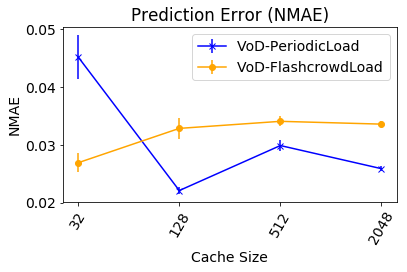

In [27]:
# Project II
# Task I - Offline learning on small-size training set
# VoD

# Basic Definitions
font = {'size'   : 14}
plt.rc('font', **font)
outdir = "~/Documentos/kth/project/results/"
cacheSizeList = [32, 128, 512, 2048]

dfVoDPeriodicLoad = pd.read_csv(outdir + "p2t1-offline-VoD-PeriodicLoad.csv", index_col=None, 
                                usecols = ["avg", "stddev"], header=0)    
print("VoD-PeriodicLoad:")
print(dfVoDPeriodicLoad)

dfVoDFlashcrowdLoad = pd.read_csv(outdir + "p2t1-offline-VoD-FlashcrowdLoad.csv", index_col=None, 
                                  usecols = ["avg", "stddev"], header=0)   
print("VoD-FlashcrowdLoad:")
print(dfVoDFlashcrowdLoad)

plt.title("Prediction Error (NMAE)")
#plt.suptitle(hostname)
    
#plt.ylim((0.03, 0.05))
#plt.yticks([0.03, 0.035, 0.04, 0.045, 0.05], [0.03, 0.035, 0.04, 0.045, 0.05])

x  = np.array(cacheSizeList)

yVoDPL = np.array(dfVoDPeriodicLoad["avg"])
yVoDFL = np.array(dfVoDFlashcrowdLoad["avg"])

errorVoDPL = np.array(dfVoDPeriodicLoad["stddev"])
errorVoDFL = np.array(dfVoDFlashcrowdLoad["stddev"])

#plt.fill_between(x, yRS - errorRS, yRS + errorRS, alpha=0.4, color = "blue")
#plt.fill_between(x, yRRFS - errorRRFS, yRRFS + errorRRFS, alpha=0.4, color = "orange")

plt.errorbar(x, yVoDPL, yerr=errorVoDPL, marker='x', label='VoD-PeriodicLoad', color = "blue")
plt.errorbar(x, yVoDFL, yerr=errorVoDFL, marker='o', label='VoD-FlashcrowdLoad', color = "orange")

#plt.plot(x, yRS, marker='x', label='RS', color = "blue")
#plt.plot(x, yRRFS, marker='o', label='RR-SS', color = "orange")

plt.xlabel("Cache Size")
plt.xscale('log', basex=2)
plt.xticks(x, x, rotation=60)

plt.ylabel("NMAE")
plt.legend(loc='best')
#plt.legend(bbox_to_anchor=(1.05, 1.0, 0.3, 0.2), loc='upper left')
plt.tight_layout()
plt.show()


In [14]:
# Project II
# Task I - Offline learning on small-size training set
# VoD
# RR-SS

# Basic Definitions
dsList = ["VoD-PeriodicLoad", "VoD-FlashcrowdLoad"]
dir = "~/Documentos/kth/project/datasets/"
outdir = "~/Documentos/kth/project/results/"
target = "DispFrames"
cacheSizeList = [32, 128, 512, 2048]
seqSize = 5000
testSize = 1000
iterations = 10

# Main
for ds in dsList:
    print("Dataset: " + ds)

    #Read X, Y raw files
    xRaw = pd.read_csv(dir + ds + "/XSelected.csv", index_col=0, header=0)
    #print("xRaw:")
    #print(xRaw)

    yRaw = pd.read_csv(dir + ds + "/YLimited.csv", usecols = [target])
    #print("yRaw:")
    #print(yRaw) 

    # Total size of the dataset
    dsSize = len(xRaw.index)

    results = pd.DataFrame(columns=['cachesize', 'iteration', 'nmae'])

    for iter in range(1, iterations+1):
        print("Iteration: " + str(iter))

        for cacheSize in cacheSizeList:
            print("Cache Size: " + str(cacheSize))

            init = rd.randint(0, dsSize//2)
            #print("Init: ")
            #print(init)

            # Define (X,Y) cache of size cacheSize
            cacheX = xRaw.iloc[init:(init+cacheSize), 0:]
            #print("cacheX:")
            #print(cacheX)
            
            cacheY = yRaw.iloc[init:(init+cacheSize), 0:2]
            #print("cacheY:")
            #print(cacheY)

            # Rebuild indexes
            cacheX = cacheX.reset_index(drop=True)
            cacheY = cacheY.reset_index(drop=True)
            #print("cacheX:")
            #print(cacheX)

            # Define a sample vector with the average of all columns in the cache
            cacheAvgSample = pd.DataFrame(cacheX.mean()).transpose()
            #print("cacheAvgSample:")
            #print(cacheAvgSample)

            # Define a vector with the redundancy values between all samples in the cache
            # and the sample vector with the average of all columns
            cacheRedundancyValues = cosine_similarity(cacheX, cacheAvgSample)
            #print("cacheRedundancyValues:")
            #print(cacheRedundancyValues)

            # Define a vector with the relevance values between all samples in the cache
            # and the sample vector with the average of all columns
            cacheRelevanceValues = euclidean_distances(cacheX, cacheAvgSample)
            #print("cacheRelevanceValues:")
            #print(cacheRelevanceValues)

            # Define a vector with the rank between all samples in the cache
            # and the sample vector with the average of all columns
            cacheRankValues = cacheRelevanceValues/cacheRedundancyValues
            #print("cacheRankValues:")
            #print(pd.DataFrame(cacheRankValues).sort_values(by=0))

            # Define the mean value of the rank vector
            cacheRankAvg = pd.DataFrame(cacheRankValues).mean()
            #print("cacheRankMean:")
            #print(cacheRankMean[0])

            # Build a RF regressor and Fit the model 
            regr = RandomForestRegressor(max_depth=10, n_estimators=30, n_jobs=4)
            #print ("Build Model Ok!")

            for index in range(init+cacheSize, init+cacheSize+seqSize):
                sampleX = xRaw.iloc[index:(index + 1), 0:]
                sampleY = yRaw.iloc[index:(index + 1), 0:2]
                #print("sampleX #" + str(index))
                #print(sampleX)

                sampleRedundancy = cosine_similarity(cacheAvgSample, sampleX)
                #print(sampleRedundancy)

                sampleRelevance = euclidean_distances(cacheAvgSample, sampleX)
                #print(sampleRelevance)

                sampleRank = sampleRelevance/sampleRedundancy
                #print("sampleRank)

                if (sampleRank[0][0] > cacheRankAvg[0]):
                #print("Sample#" + str(index) + ": Insert")

                    # Find the index of the sample with the minimum rank in the cache
                    idxMinCache = pd.DataFrame(cacheRankValues).idxmin().values[0]
                    #print(idxMinCache)

                    # Remove idxMinCache sample from the cache
                    #print(cacheX.iloc[idxMinCache])
                    cacheX = cacheX.drop([idxMinCache])
                    cacheY = cacheY.drop([idxMinCache])

                    # Rebuild indexes
                    #cacheX = cacheX.reset_index(drop=True)
                    #cacheY = cacheY.reset_index(drop=True)

                    # Insert the new sample in the cache      
                    cacheX = pd.concat([sampleX, cacheX], ignore_index=True, sort=True)
                    cacheY = pd.concat([sampleY, cacheY], ignore_index=True, sort=True)
                            
                    # Rebuild indexes
                    cacheX = cacheX.reset_index(drop=True)
                    cacheY = cacheY.reset_index(drop=True)

                    # Update the sample vector with the average of all columns in the cache
                    cacheAvgSample = pd.DataFrame(cacheX.mean()).transpose()
                    #print(cacheAvgSample)

                    # Update the vector with the redundancy values between all samples in the cache
                    # and the sample vector with the average of all columns
                    cacheRedundancyValues = cosine_similarity(cacheX, cacheAvgSample)
                    #print(cacheRedundancyValues)

                    # Update the vector with the relevance values between all samples in the cache
                    # and the sample vector with the average of all columns
                    cacheRelevanceValues = euclidean_distances(cacheX, cacheAvgSample)
                    #print(cacheRelevanceValues)

                    # Update the vector with the rank between all samples in the cache
                    # and the sample vector with the average of all columns
                    cacheRankValues = cacheRelevanceValues/cacheRedundancyValues
                    #print(cacheRankValues)
                    #print(pd.DataFrame(cacheRankValues).sort_values(by=0))

                    # Update the average value of the rank vector
                    cacheRankAvg = pd.DataFrame(cacheRankValues).mean()
                    #print(cacheRankMedian)
            
            # Build the Model
            regr.fit(cacheX, cacheY)

            #print("TestIndex: " + str(index))
            
            # Defining (X,Y) test dataset for next predictions
            testX = xRaw.iloc[index:(index+testSize), 0:]
            testY = yRaw.iloc[index:(index+testSize), 0:2]
            #print("testX:")
            #print(testX)
            #print("testY:")
            #print(testY)

            # Do Predictions
            predictedY = regr.predict(testX)

            #print("predictedY:")
            #print(predictedY)
            #print("testY:")
            #print(testY.values.ravel())

            # Calculate NMAE
            nmae  = (abs(predictedY - testY.values.ravel()).mean())/(testY.values.ravel().mean())
            #print("NMAE: " + str(nmae))

            nr = results.append({'cachesize': cacheSize, 'iteration': iter, 'nmae': nmae},  
                                    ignore_index=True)
            results = pd.concat([nr])
    results.to_csv(outdir + "p2t1-3-" + ds + ".csv")


Dataset: VoD-PeriodicLoad
Iteration: 1
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 2
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 3
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 4
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 5
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 6
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 7
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 8
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 9
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 10
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Dataset: VoD-FlashcrowdLoad
Iteration: 1
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 2
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 3
Cache Si

In [15]:
# Project II
# Task I - Offline learning on small-size training set
# VoD

# Basic Definitions
dsList = ["VoD-PeriodicLoad", "VoD-FlashcrowdLoad"]
dir = "~/Documentos/kth/project/datasets/"
outdir = "~/Documentos/kth/project/results/"
target = "DispFrames"
cacheSizeList = [32, 128, 512, 2048]

for ds in dsList:
    print("Dataset: " + ds)

    results = pd.read_csv(outdir + "p2t1-3-" + ds + ".csv", index_col=0)
    print(results)

    graphResults = pd.DataFrame(columns=['cachesize', 'avg', 'stddev'])

    for cacheSize in cacheSizeList:
        print("Cache Size: " + str(cacheSize))

        cacheResults = results[results['cachesize']==cacheSize]
        #print(cacheResults)

        nr = graphResults.append({'cachesize': cacheSize, 'avg': cacheResults['nmae'].mean(), 
                                  'stddev': cacheResults['nmae'].std()}, ignore_index=True)
        graphResults = pd.concat([nr])
    
    print(graphResults)
    graphResults.to_csv(outdir + "p2t1-rrss-" + ds + ".csv")


Dataset: VoD-PeriodicLoad
    cachesize  iteration      nmae
0        32.0        1.0  0.001156
1       128.0        1.0  0.033075
2       512.0        1.0  0.039954
3      2048.0        1.0  0.043582
4        32.0        2.0  0.005353
5       128.0        2.0  0.029192
6       512.0        2.0  0.052360
7      2048.0        2.0  0.062214
8        32.0        3.0  0.001210
9       128.0        3.0  0.023493
10      512.0        3.0  0.029637
11     2048.0        3.0  0.055653
12       32.0        4.0  0.001210
13      128.0        4.0  0.049078
14      512.0        4.0  0.028388
15     2048.0        4.0  0.068108
16       32.0        5.0  0.008107
17      128.0        5.0  0.023812
18      512.0        5.0  0.068577
19     2048.0        5.0  0.051210
20       32.0        6.0  0.051408
21      128.0        6.0  0.023625
22      512.0        6.0  0.059318
23     2048.0        6.0  0.048322
24       32.0        7.0  0.041655
25      128.0        7.0  0.003152
26      512.0        7.0  0.0

VoD-PeriodicLoad:
        avg    stddev
0  0.020306  0.023192
1  0.025285  0.011661
2  0.045602  0.014133
3  0.056102  0.009126
VoD-FlashcrowdLoad:
        avg    stddev
0  0.018986  0.008249
1  0.018810  0.008123
2  0.033077  0.012749
3  0.041735  0.011303


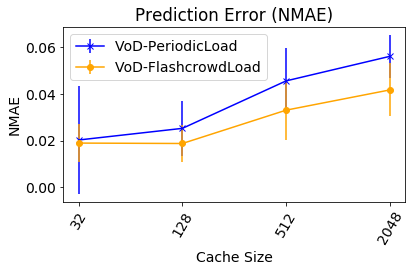

In [16]:
# Project II
# Task I - Offline learning on small-size training set
# VoD

# Basic Definitions
font = {'size'   : 14}
plt.rc('font', **font)
outdir = "~/Documentos/kth/project/results/"
cacheSizeList = [32, 128, 512, 2048]

dfVoDPeriodicLoad = pd.read_csv(outdir + "p2t1-rrss-VoD-PeriodicLoad.csv", index_col=None, 
                                usecols = ["avg", "stddev"], header=0)    
print("VoD-PeriodicLoad:")
print(dfVoDPeriodicLoad)

dfVoDFlashcrowdLoad = pd.read_csv(outdir + "p2t1-rrss-VoD-FlashcrowdLoad.csv", index_col=None, 
                                  usecols = ["avg", "stddev"], header=0)   
print("VoD-FlashcrowdLoad:")
print(dfVoDFlashcrowdLoad)

plt.title("Prediction Error (NMAE)")
#plt.suptitle(hostname)
    
#plt.ylim((0.03, 0.05))
#plt.yticks([0.03, 0.035, 0.04, 0.045, 0.05], [0.03, 0.035, 0.04, 0.045, 0.05])

x  = np.array(cacheSizeList)

yVoDPL = np.array(dfVoDPeriodicLoad["avg"])
yVoDFL = np.array(dfVoDFlashcrowdLoad["avg"])

errorVoDPL = np.array(dfVoDPeriodicLoad["stddev"])
errorVoDFL = np.array(dfVoDFlashcrowdLoad["stddev"])

#plt.fill_between(x, yRS - errorRS, yRS + errorRS, alpha=0.4, color = "blue")
#plt.fill_between(x, yRRFS - errorRRFS, yRRFS + errorRRFS, alpha=0.4, color = "orange")

plt.errorbar(x, yVoDPL, yerr=errorVoDPL, marker='x', label='VoD-PeriodicLoad', color = "blue")
plt.errorbar(x, yVoDFL, yerr=errorVoDFL, marker='o', label='VoD-FlashcrowdLoad', color = "orange")

#plt.plot(x, yRS, marker='x', label='RS', color = "blue")
#plt.plot(x, yRRFS, marker='o', label='RR-SS', color = "orange")

plt.xlabel("Cache Size")
plt.xscale('log', basex=2)
plt.xticks(x, x, rotation=60)

plt.ylabel("NMAE")
plt.legend(loc='best')
#plt.legend(bbox_to_anchor=(1.05, 1.0, 0.3, 0.2), loc='upper left')
plt.tight_layout()
plt.show()


VoD-PeriodicLoad - Baseline:
        avg    stddev
0  0.030585  0.000133
VoD-PeriodicLoad - Offline:
        avg    stddev
0  0.045218  0.003823
1  0.022081  0.000633
2  0.029881  0.001007
3  0.025873  0.000436
VoD-PeriodicLoad - RRSS:
        avg    stddev
0  0.020306  0.023192
1  0.025285  0.011661
2  0.045602  0.014133
3  0.056102  0.009126


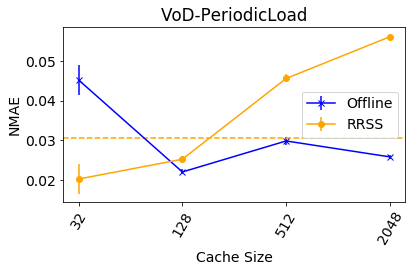

VoD-FlashcrowdLoad - Baseline:
        avg    stddev
0  0.031135  0.000127
VoD-FlashcrowdLoad - Offline:
        avg    stddev
0  0.026905  0.001639
1  0.032855  0.001776
2  0.034078  0.000880
3  0.033593  0.000489
VoD-FlashcrowdLoad - RRSS:
        avg    stddev
0  0.018986  0.008249
1  0.018810  0.008123
2  0.033077  0.012749
3  0.041735  0.011303


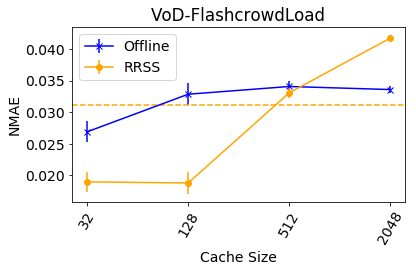

In [10]:
c

# Basic Definitions
font = {'size'   : 14}
plt.rc('font', **font)
outdir = "~/Documentos/kth/project/results/"
savedir = "/home/rodolfo/Documentos/kth/project/results/"
cacheSizeList = [32, 128, 512, 2048]
dsList = ["VoD-PeriodicLoad", "VoD-FlashcrowdLoad"]

for ds in dsList:

    dfBaseline = pd.read_csv(outdir + "p2t1-baseline-" + ds + ".csv", index_col=None, 
                             usecols = ["avg", "stddev"], header=0)    
    print(ds + " - Baseline:")
    print(dfBaseline)

    dfOffline = pd.read_csv(outdir + "p2t1-offline-" + ds + ".csv", index_col=None, 
                            usecols = ["avg", "stddev"], header=0)   
    print(ds + " - Offline:")
    print(dfOffline)

    dfRRSS = pd.read_csv(outdir + "p2t1-rrss-" + ds + ".csv", index_col=None, 
                         usecols = ["avg", "stddev"], header=0)    
    print(ds + " - RRSS:")
    print(dfRRSS)

    #plt.suptitle("Prediction Error (NMAE)")
    plt.title(ds)
    
    #plt.ylim((0.03, 0.05))
    #plt.yticks([0.03, 0.035, 0.04, 0.045, 0.05], [0.03, 0.035, 0.04, 0.045, 0.05])

    x  = np.array(cacheSizeList)

    yBaseline = np.array(dfBaseline["avg"])
    yOffline = np.array(dfOffline["avg"])
    yRRSS = np.array(dfRRSS["avg"])

    errorBaseline = np.array(dfBaseline["stddev"])
    errorOffline = np.array(dfOffline["stddev"])
    errorRRSS = np.array(dfOffline["stddev"])

    #plt.fill_between(x, yRS - errorRS, yRS + errorRS, alpha=0.4, color = "blue")
    #plt.fill_between(x, yRRFS - errorRRFS, yRRFS + errorRRFS, alpha=0.4, color = "orange")

    plt.errorbar(x, yOffline, yerr=errorOffline, marker='x', label='Offline', color = "blue")
    plt.errorbar(x, yRRSS, yerr=errorRRSS, marker='o', label='RRSS', color = "orange")
    plt.axhline(yBaseline, linestyle ="--", color = "orange")

    #plt.plot(x, yRS, marker='x', label='RS', color = "blue")
    #plt.plot(x, yRRFS, marker='o', label='RR-SS', color = "orange")

    plt.xlabel("Cache Size")
    plt.xscale('log', basex=2)
    plt.xticks(x, x, rotation=60)

    plt.ylabel("NMAE")
    plt.legend(loc='best')
    #plt.legend(bbox_to_anchor=(1.05, 1.0, 0.3, 0.2), loc='upper left')
    plt.tight_layout()
    plt.show()
    filename = savedir + "p1t1-" + ds + ".png"
    #print(filename)
    #plt.savefig(filename)
    plt.close()


In [11]:
# Project II
# Task II - Online learning on a small-size training set
# VoD - RRSS

# Basic Definitions
dsList = ["VoD-PeriodicLoad", "VoD-FlashcrowdLoad"]
dir = "~/Documentos/kth/project/datasets/"
outdir = "~/Documentos/kth/project/results/"
target = "DispFrames"
cacheSizeList = [32, 128, 512, 2048]
seqSize = 1000
iterations = 10

# Main
for ds in dsList:
    print("Dataset: " + ds)

    #Read X, Y raw files
    xRaw = pd.read_csv(dir + ds + "/XSelected.csv", index_col=0, header=0)
    #print("xRaw:")
    #print(xRaw)

    yRaw = pd.read_csv(dir + ds + "/YLimited.csv", usecols = [target])
    #print("yRaw:")
    #print(yRaw) 

    # Total size of the dataset
    dsSize = len(xRaw.index)

    results = pd.DataFrame(columns=['cachesize', 'iteration', 'nmae'])

    for iter in range(1, iterations+1):
        print("Iteration: " + str(iter))

        for cacheSize in cacheSizeList:
            print("Cache Size: " + str(cacheSize))

            init = rd.randint(0, dsSize//2)
            #print("Init: ")
            #print(init)

            # Define (X,Y) cache of size cacheSize
            cacheX = xRaw.iloc[init:(init+cacheSize), 0:]
            #print("cacheX:")
            #print(cacheX)
            
            cacheY = yRaw.iloc[init:(init+cacheSize), 0:2]
            #print("cacheY:")
            #print(cacheY)

            # Rebuild indexes
            cacheX = cacheX.reset_index(drop=True)
            cacheY = cacheY.reset_index(drop=True)
            #print("cacheX:")
            #print(cacheX)

            # Define a sample vector with the average of all columns in the cache
            cacheAvgSample = pd.DataFrame(cacheX.mean()).transpose()
            #print("cacheAvgSample:")
            #print(cacheAvgSample)

            # Define a vector with the redundancy values between all samples in the cache
            # and the sample vector with the average of all columns
            cacheRedundancyValues = cosine_similarity(cacheX, cacheAvgSample)
            #print("cacheRedundancyValues:")
            #print(cacheRedundancyValues)

            # Define a vector with the relevance values between all samples in the cache
            # and the sample vector with the average of all columns
            cacheRelevanceValues = euclidean_distances(cacheX, cacheAvgSample)
            #print("cacheRelevanceValues:")
            #print(cacheRelevanceValues)

            # Define a vector with the rank between all samples in the cache
            # and the sample vector with the average of all columns
            cacheRankValues = cacheRelevanceValues/cacheRedundancyValues
            #print("cacheRankValues:")
            #print(pd.DataFrame(cacheRankValues).sort_values(by=0))

            # Define the mean value of the rank vector
            cacheRankAvg = pd.DataFrame(cacheRankValues).mean()
            #print("cacheRankMean:")
            #print(cacheRankMean[0])

            # Build a RF regressor and Fit the model 
            regr = RandomForestRegressor(max_depth=10, n_estimators=30, n_jobs=4)
            #print ("Build Model Ok!")

            for index in range(init+cacheSize, init+cacheSize+seqSize):
                sampleX = xRaw.iloc[index:(index + 1), 0:]
                sampleY = yRaw.iloc[index:(index + 1), 0:2]
                #print("sampleX #" + str(index))
                #print(sampleX)

                sampleRedundancy = cosine_similarity(cacheAvgSample, sampleX)
                #print(sampleRedundancy)

                sampleRelevance = euclidean_distances(cacheAvgSample, sampleX)
                #print(sampleRelevance)

                sampleRank = sampleRelevance/sampleRedundancy
                #print("sampleRank)

                if (sampleRank[0][0] > cacheRankAvg[0]):
                #print("Sample#" + str(index) + ": Insert")

                    # Find the index of the sample with the minimum rank in the cache
                    idxMinCache = pd.DataFrame(cacheRankValues).idxmin().values[0]
                    #print(idxMinCache)

                    # Remove idxMinCache sample from the cache
                    #print(cacheX.iloc[idxMinCache])
                    cacheX = cacheX.drop([idxMinCache])
                    cacheY = cacheY.drop([idxMinCache])

                    # Rebuild indexes
                    #cacheX = cacheX.reset_index(drop=True)
                    #cacheY = cacheY.reset_index(drop=True)

                    # Insert the new sample in the cache      
                    cacheX = pd.concat([sampleX, cacheX], ignore_index=True, sort=True)
                    cacheY = pd.concat([sampleY, cacheY], ignore_index=True, sort=True)
                            
                    # Rebuild indexes
                    cacheX = cacheX.reset_index(drop=True)
                    cacheY = cacheY.reset_index(drop=True)

                    # Update the sample vector with the average of all columns in the cache
                    cacheAvgSample = pd.DataFrame(cacheX.mean()).transpose()
                    #print(cacheAvgSample)

                    # Update the vector with the redundancy values between all samples in the cache
                    # and the sample vector with the average of all columns
                    cacheRedundancyValues = cosine_similarity(cacheX, cacheAvgSample)
                    #print(cacheRedundancyValues)

                    # Update the vector with the relevance values between all samples in the cache
                    # and the sample vector with the average of all columns
                    cacheRelevanceValues = euclidean_distances(cacheX, cacheAvgSample)
                    #print(cacheRelevanceValues)

                    # Update the vector with the rank between all samples in the cache
                    # and the sample vector with the average of all columns
                    cacheRankValues = cacheRelevanceValues/cacheRedundancyValues
                    #print(cacheRankValues)
                    #print(pd.DataFrame(cacheRankValues).sort_values(by=0))

                    # Update the average value of the rank vector
                    cacheRankAvg = pd.DataFrame(cacheRankValues).mean()
                    #print(cacheRankMedian)
            
            # Build the Model
            regr.fit(cacheX, cacheY)

            #print("TestIndex: " + str(index))
            
            # Defining (X,Y) test dataset for next predictions
            testX = xRaw.iloc[index:dsSize, 0:]
            testY = yRaw.iloc[index:dsSize, 0:2]
            #print("testX:")
            #print(testX)
            #print("testY:")
            #print(testY)

            # Do Predictions
            predictedY = regr.predict(testX)

            #print("predictedY:")
            #print(predictedY)
            #print("testY:")
            #print(testY.values.ravel())

            # Calculate NMAE
            nmae  = (abs(predictedY - testY.values.ravel()).mean())/(testY.values.ravel().mean())
            print("NMAE: " + str(nmae))

            nr = results.append({'cachesize': cacheSize, 'iteration': iter, 'nmae': nmae},  
                                    ignore_index=True)
            results = pd.concat([nr])
    print(results)
    results.to_csv(outdir + "p2t2-1-" + ds + ".csv")



Dataset: VoD-PeriodicLoad
Iteration: 1
Cache Size: 32
NMAE: 0.017734961265586796
Cache Size: 128
NMAE: 0.01853339065939121
Cache Size: 512
NMAE: 0.09852813466656186
Cache Size: 2048
NMAE: 0.07489189405403404
Iteration: 2
Cache Size: 32
NMAE: 0.017347104510622123
Cache Size: 128
NMAE: 0.020853871459155307
Cache Size: 512
NMAE: 0.05563034219488739
Cache Size: 2048
NMAE: 0.07384051745773883
Iteration: 3
Cache Size: 32
NMAE: 0.017697706362290958
Cache Size: 128
NMAE: 0.01832265136959331
Cache Size: 512
NMAE: 0.06888277057107568
Cache Size: 2048
NMAE: 0.0702561402214029
Iteration: 4
Cache Size: 32
NMAE: 0.0172707727276129
Cache Size: 128
NMAE: 0.01781019456883827
Cache Size: 512
NMAE: 0.02390168933701451
Cache Size: 2048
NMAE: 0.05439730596544205
Iteration: 5
Cache Size: 32
NMAE: 0.01755400493798157
Cache Size: 128
NMAE: 0.07583019581330726
Cache Size: 512
NMAE: 0.03408761798732081
Cache Size: 2048
NMAE: 0.047535997610211815
Iteration: 6
Cache Size: 32
NMAE: 0.017396493631402693
Cache Size:

In [15]:
# Project II
# Task II - Online learning on a small-size training set
# VoD - RS

# Basic Definitions
dsList = ["VoD-PeriodicLoad", "VoD-FlashcrowdLoad"]
dir = "~/Documentos/kth/project/datasets/"
outdir = "~/Documentos/kth/project/results/"
target = "DispFrames"
cacheSizeList = [32, 128, 512, 2048]
seqSize = 1000
iterations = 10

# Main
for ds in dsList:
    print("Dataset: " + ds)

    #Read X, Y raw files
    xRaw = pd.read_csv(dir + ds + "/XSelected.csv", index_col=0, header=0)
    #print("xRaw:")
    #print(xRaw)

    yRaw = pd.read_csv(dir + ds + "/YLimited.csv", usecols = [target])
    #print("yRaw:")
    #print(yRaw) 

    # Total size of the dataset
    dsSize = len(xRaw.index)

    results = pd.DataFrame(columns=['cachesize', 'iteration', 'nmae'])

    for iter in range(1, iterations+1):
        print("Iteration: " + str(iter))

        for cacheSize in cacheSizeList:
            print("Cache Size: " + str(cacheSize))

            init = rd.randint(0, dsSize//2)
            #print("Init: ")
            #print(init)

            # Define (X,Y) cache of size cacheSize
            cacheX = xRaw.iloc[init:(init+cacheSize), 0:]
            #print("cacheX:")
            #print(cacheX)
            
            cacheY = yRaw.iloc[init:(init+cacheSize), 0:2]
            #print("cacheY:")
            #print(cacheY)

            # Rebuild indexes
            cacheX = cacheX.reset_index(drop=True)
            cacheY = cacheY.reset_index(drop=True)
            #print("cacheX:")
            #print(cacheX)

            # Build a RF regressor and Fit the model 
            regr = RandomForestRegressor(max_depth=10, n_estimators=30, n_jobs=4)
            #print ("Build Model Ok!")

            for index in range(init+cacheSize, init+cacheSize+seqSize):
                #print(index-init+1)
                irs = rd.randint(0, index-init)

                sampleX = xRaw.iloc[index:(index + 1), 0:]
                sampleY = yRaw.iloc[index:(index + 1), 0:2]
                #print("sampleX #" + str(index))
                #print(sampleX)

                if (irs < cacheSize):
                    #print("Sample#" + str(index) + ": Insert")

                    cacheX = cacheX.drop([irs])
                    cacheY = cacheY.drop([irs])

                    # Rebuild indexes
                    cacheX = cacheX.reset_index(drop=True)
                    cacheY = cacheY.reset_index(drop=True)

                    # Insert the new sample in the cache      
                    cacheX = pd.concat([sampleX, cacheX], ignore_index=True, sort=True)
                    cacheY = pd.concat([sampleY, cacheY], ignore_index=True, sort=True)
                            
                    # Rebuild indexes
                    cacheX = cacheX.reset_index(drop=True)
                    cacheY = cacheY.reset_index(drop=True)
            
            # Build the Model
            regr.fit(cacheX, cacheY)

            #print("TestIndex: " + str(index))
            
            # Defining (X,Y) test dataset for next predictions
            testX = xRaw.iloc[index:dsSize, 0:]
            testY = yRaw.iloc[index:dsSize, 0:2]
            #print("testX:")
            #print(testX)
            #print("testY:")
            #print(testY)

            # Do Predictions
            predictedY = regr.predict(testX)

            #print("predictedY:")
            #print(predictedY)
            #print("testY:")
            #print(testY.values.ravel())

            # Calculate NMAE
            nmae  = (abs(predictedY - testY.values.ravel()).mean())/(testY.values.ravel().mean())
            #print("NMAE: " + str(nmae))

            nr = results.append({'cachesize': cacheSize, 'iteration': iter, 'nmae': nmae},  
                                    ignore_index=True)
            results = pd.concat([nr])
    print(results)
    results.to_csv(outdir + "p2t2-2-" + ds + ".csv")



Dataset: VoD-PeriodicLoad
Iteration: 1
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 2
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 3
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 4
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 5
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 6
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 7
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 8
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 9
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
Iteration: 10
Cache Size: 32
Cache Size: 128
Cache Size: 512
Cache Size: 2048
    cachesize  iteration      nmae
0        32.0        1.0  0.049775
1       128.0        1.0  0.054721
2       512.0        1.0  0.019846
3      2048.0        1.0  0.092831
4        32.0        2.0  0.

In [16]:
# Project II
# Task II - Online learning on a small-size training set
# VoD - Statistics 

# Basic Definitions
dsList = ["VoD-PeriodicLoad", "VoD-FlashcrowdLoad"]
dir = "~/Documentos/kth/project/datasets/"
outdir = "~/Documentos/kth/project/results/"
target = "DispFrames"
cacheSizeList = [32, 128, 512, 2048]

for ds in dsList:
    print("Dataset: " + ds)

    results = pd.read_csv(outdir + "p2t2-1-" + ds + ".csv", index_col=0)
    print(results)

    graphResults = pd.DataFrame(columns=['cachesize', 'avg', 'stddev'])

    for cacheSize in cacheSizeList:
        print("Cache Size: " + str(cacheSize))

        cacheResults = results[results['cachesize']==cacheSize]
        #print(cacheResults)

        nr = graphResults.append({'cachesize': cacheSize, 'avg': cacheResults['nmae'].mean(), 
                                  'stddev': cacheResults['nmae'].std()}, ignore_index=True)
        graphResults = pd.concat([nr])
    
    print(graphResults)
    graphResults.to_csv(outdir + "p2t2-rrss-" + ds + ".csv")

for ds in dsList:
    print("Dataset: " + ds)

    results = pd.read_csv(outdir + "p2t2-2-" + ds + ".csv", index_col=0)
    print(results)

    graphResults = pd.DataFrame(columns=['cachesize', 'avg', 'stddev'])

    for cacheSize in cacheSizeList:
        print("Cache Size: " + str(cacheSize))

        cacheResults = results[results['cachesize']==cacheSize]
        #print(cacheResults)

        nr = graphResults.append({'cachesize': cacheSize, 'avg': cacheResults['nmae'].mean(), 
                                  'stddev': cacheResults['nmae'].std()}, ignore_index=True)
        graphResults = pd.concat([nr])
    
    print(graphResults)
    graphResults.to_csv(outdir + "p2t2-rs-" + ds + ".csv")


Dataset: VoD-PeriodicLoad
    cachesize  iteration      nmae
0        32.0        1.0  0.017735
1       128.0        1.0  0.018533
2       512.0        1.0  0.058528
3      2048.0        1.0  0.054892
4        32.0        2.0  0.017347
5       128.0        2.0  0.020854
6       512.0        2.0  0.055630
7      2048.0        2.0  0.073841
8        32.0        3.0  0.017698
9       128.0        3.0  0.018323
10      512.0        3.0  0.048883
11     2048.0        3.0  0.070256
12       32.0        4.0  0.017271
13      128.0        4.0  0.017810
14      512.0        4.0  0.023902
15     2048.0        4.0  0.054397
16       32.0        5.0  0.017554
17      128.0        5.0  0.055830
18      512.0        5.0  0.034088
19     2048.0        5.0  0.047536
20       32.0        6.0  0.017396
21      128.0        6.0  0.031481
22      512.0        6.0  0.037174
23     2048.0        6.0  0.055308
24       32.0        7.0  0.016917
25      128.0        7.0  0.024694
26      512.0        7.0  0.0

In [18]:
# Project II
# Task II - Online learning on a small-size training set
# VoD - Final Results

# Basic Definitions
font = {'size'   : 14}
plt.rc('font', **font)
outdir = "~/Documentos/kth/project/results/"
savedir = "/home/rodolfo/Documentos/kth/project/results/"
cacheSizeList = [32, 128, 512, 2048]
dsList = ["VoD-PeriodicLoad", "VoD-FlashcrowdLoad"]

for ds in dsList:

    dfBaseline = pd.read_csv(outdir + "p2t1-baseline-" + ds + ".csv", index_col=None, 
                             usecols = ["avg", "stddev"], header=0)    
    print(ds + " - Baseline:")
    print(dfBaseline)

    dfRS = pd.read_csv(outdir + "p2t2-rs-" + ds + ".csv", index_col=None, 
                            usecols = ["avg", "stddev"], header=0)   
    print(ds + " - RS:")
    print(dfOffline)

    dfRRSS = pd.read_csv(outdir + "p2t2-rrss-" + ds + ".csv", index_col=None, 
                         usecols = ["avg", "stddev"], header=0)    
    print(ds + " - RRSS:")
    print(dfRRSS)

    #plt.suptitle("Prediction Error (NMAE)")
    plt.title(ds)
    
    #plt.ylim((0.03, 0.05))
    #plt.yticks([0.03, 0.035, 0.04, 0.045, 0.05], [0.03, 0.035, 0.04, 0.045, 0.05])

    x  = np.array(cacheSizeList)

    yBaseline = np.array(dfBaseline["avg"])
    yRS = np.array(dfRS["avg"])
    yRRSS = np.array(dfRRSS["avg"])

    errorBaseline = np.array(dfBaseline["stddev"])
    errorRS = np.array(dfRS["stddev"])
    errorRRSS = np.array(dfRRSS["stddev"])

    #plt.fill_between(x, yRS - errorRS, yRS + errorRS, alpha=0.4, color = "blue")
    #plt.fill_between(x, yRRFS - errorRRFS, yRRFS + errorRRFS, alpha=0.4, color = "orange")

    plt.errorbar(x, yRS, yerr=errorRS, marker='x', label='RS', color = "blue")
    plt.errorbar(x, yRRSS, yerr=errorRRSS, marker='o', label='RRSS', color = "orange")
    plt.axhline(yBaseline, linestyle ="--", color = "orange")

    #plt.plot(x, yRS, marker='x', label='RS', color = "blue")
    #plt.plot(x, yRRFS, marker='o', label='RR-SS', color = "orange")

    plt.xlabel("Cache Size")
    plt.xscale('log', basex=2)
    plt.xticks(x, x, rotation=60)

    plt.ylabel("NMAE")
    plt.legend(loc='best')
    #plt.legend(bbox_to_anchor=(1.05, 1.0, 0.3, 0.2), loc='upper left')
    plt.tight_layout()
    #plt.show()
    filename = savedir + "p2t2-" + ds + ".png"
    #print(filename)
    plt.savefig(filename)
    plt.close()


VoD-PeriodicLoad - Baseline:
        avg    stddev
0  0.030585  0.000133
VoD-PeriodicLoad - RS:
        avg    stddev
0  0.026905  0.001639
1  0.032855  0.001776
2  0.034078  0.000880
3  0.033593  0.000489
VoD-PeriodicLoad - RRSS:
        avg    stddev
0  0.018770  0.003144
1  0.028935  0.014735
2  0.046540  0.013193
3  0.057476  0.009441
VoD-FlashcrowdLoad - Baseline:
        avg    stddev
0  0.031135  0.000127
VoD-FlashcrowdLoad - RS:
        avg    stddev
0  0.026905  0.001639
1  0.032855  0.001776
2  0.034078  0.000880
3  0.033593  0.000489
VoD-FlashcrowdLoad - RRSS:
        avg    stddev
0  0.020343  0.004308
1  0.034172  0.013702
2  0.042751  0.006072
3  0.051893  0.005917
